# Creating random MIMO Channel Matrices from a DeepMimo Scenario

In [1]:
import numpy as np
import os, time
import matplotlib.pyplot as plt

from neoradium import DeepMimoData, Carrier, Trajectory, TrjChannel, AntennaPanel, random


In [2]:
# Replace this with the folder on your computer where you store DeepMIMO scenarios
dataFolder = "/data/RayTracing/DeepMIMO/Scenarios/V4/"
DeepMimoData.setScenariosPath(dataFolder)

# Get information about a scenario:
DeepMimoData.showScenarioInfo("asu_campus_3p5")

Scenario:          asu_campus_3p5
File Version:      4.0.0a3
Carrier Frequency: 3.5 GHz
Data Folder:       /Users/shahab/data/RayTracing/DeepMIMO/Scenarios/V4/asu_campus_3p5/

UE Grids: (1)
  rx_grid: ID:0, Num UEs:131,931, xRange:-225.55..184.45, yRange:-160.17..159.83

Base Stations: (1)
  BS: ID:1, Position:(166.00,104.00,22.00)


In [3]:
# Using the above information we create a DeepMimoData object for user grid 0 and base station 1:
deepMimoData = DeepMimoData("asu_campus_3p5", baseStationId=1, gridId=0)
deepMimoData.print()



DeepMimoData Properties:
  Scenario:                   asu_campus_3p5
  Version:                    4.0.0a3
  UE Grid:                    rx_grid
  Grid Size:                  411 x 321
  Base Station:               BS (at [166. 104.  22.])
  Total Grid Points:          131,931
  UE Spacing:                 [1. 1.]
  UE bounds (xyMin, xyMax)    [-225.55 -160.17], [184.45 159.83]
  UE Height:                  1.50
  Carrier Frequency:          3.5 GHz
  Num. paths (Min, Avg, Max): 0, 6.21, 10
  Num. total blockage:        46774
  LOS percentage:             19.71%



(<Figure size 742.518x471.734 with 1 Axes>,
 <Axes: title={'center': 'Map of LOS/NLOS paths'}, xlabel='X', ylabel='Y'>)

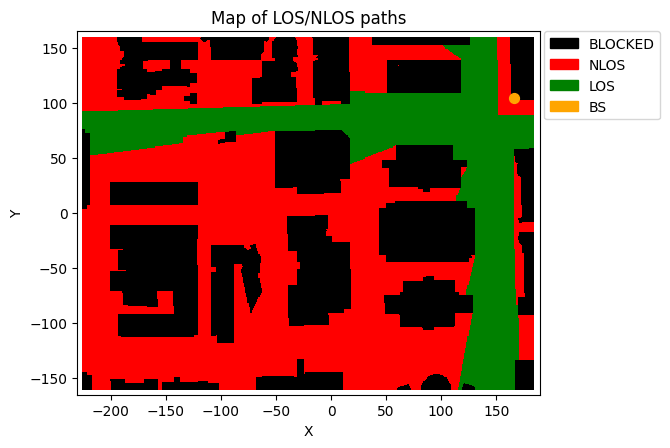

In [4]:
# Draw a map of the scenario showing the Line-Of-Sight (LOS) vs Non-Line-Of-Sight (NLOS) communication
# between the UEs and the base station.
deepMimoData.drawMap("LOS-NLOS")  # Also try "1stPathDelays" or "1stPathPowers"


## Create 1000 channels for a SISO communication (All default settings)

shape of 'allChannels': (1000, 14, 300, 1, 1)


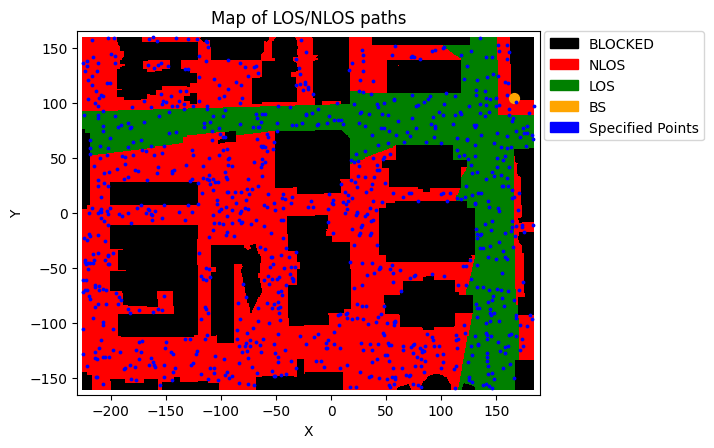

In [5]:
# First create a carrier object with 25 PRBs and 15KHz subcarrier spacing
carrier = Carrier(startRb=0, numRbs=25, spacing=15)

# Now create the generator with default settings
chanGen = deepMimoData.getChanGen(1000, carrier.curBwp)

# Draw the selected points on the map.
deepMimoData.drawMap("LOS-NLOS", chanGen.pointIdx)

# create the channel matrices
allChannels = np.stack([chan for chan in chanGen])  
print(f"shape of 'allChannels': {allChannels.shape}")           

## Create 1000 MIMO channels with more filters

shape of 'allChannels': (1000, 14, 300, 4, 16)


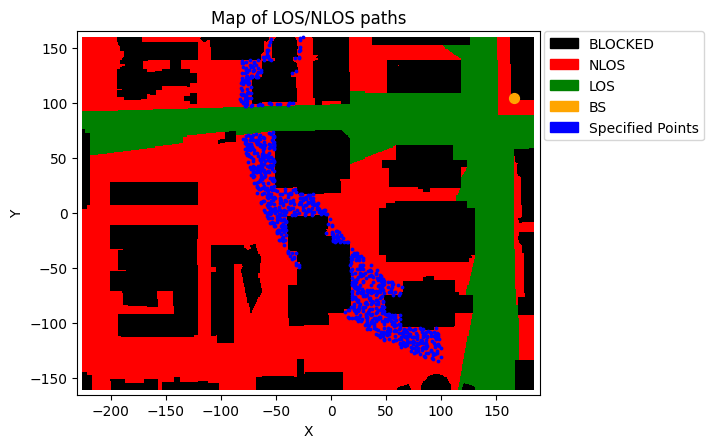

In [6]:
# Create 1000 MIMO channel matrices
chanGen = deepMimoData.getChanGen(1000, 
                                  carrier.curBwp,   # Bandwidth Part  
                                  los=False,        # Include only non-line-of-sight channels
                                  minDist=200,      # With distances to the base station between 200
                                  maxDist=250,      # and 250 meters
                                  maxX=100,         # and maximum x-coordinate of 100 meters
                                  ueSpeed=(10,20),  # UE speed between 10 and 20 mps
                                  ueDir=[0, 270],   # Going right or down
                                  txAntenna=AntennaPanel([2,4], polarization="x"),  # 16 TX antenna
                                  txOrientation=[180,0,0],                          # Facing to the left
                                  rxAntenna=AntennaPanel([1,2], polarization="x"),  # 4 RX antenna
                                  seed=123)                                         # Reproducible results
                                  

# Draw the selected points on the map.
deepMimoData.drawMap("LOS-NLOS", chanGen.pointIdx)

# create the channel matrices
allChannels = np.stack([chan for chan in chanGen])  
print(f"shape of 'allChannels': {allChannels.shape}")           